<a href="https://colab.research.google.com/github/dorababupudi/deeplearning/blob/main/Deep_learning_EXP_NO_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Embedding, Dense
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

In [13]:
max_word_range=10000

(input_train,output_train),(input_test,output_test)=imdb.load_data(num_words=max_word_range)

print(len(input_train),'train sequences')
print(len(input_test),'test sequences')


25000 train sequences
25000 test sequences


In [14]:
max_word_amount=500

input_train = sequence.pad_sequences(input_train, maxlen=max_word_amount)
input_test = sequence.pad_sequences(input_test, maxlen=max_word_amount)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [16]:
model = Sequential([
  Embedding(max_word_range, 32, input_length=max_word_amount),
  CuDNNLSTM(32),
  Dense(1, activation='sigmoid')
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           320000    
                                                                 
 cu_dnnlstm_1 (CuDNNLSTM)    (None, 32)                8448      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,481
Trainable params: 328,481
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(input_train, output_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 35s 169ms/step - loss: 0.6071 - accuracy: 0.6517 - val_loss: 0.4642 - val_accuracy: 0.7910
Epoch 2/10
157/157 [==============================] - 20s 130ms/step - loss: 0.3744 - accuracy: 0.8425 - val_loss: 0.3646 - val_accuracy: 0.8520
Epoch 3/10
157/157 [==============================] - 15s 97ms/step - loss: 0.2849 - accuracy: 0.8850 - val_loss: 0.3020 - val_accuracy: 0.8764
Epoch 4/10
157/157 [==============================] - 13s 81ms/step - loss: 0.2427 - accuracy: 0.9078 - val_loss: 0.2979 - val_accuracy: 0.8790
Epoch 5/10
157/157 [==============================] - 10s 64ms/step - loss: 0.2137 - accuracy: 0.9202 - val_loss: 0.3152 - val_accuracy: 0.8768
Epoch 6/10
157/157 [==============================] - 11s 67ms/step - loss: 0.1958 - accuracy: 0.9274 - val_loss: 0.3335 - val_accuracy: 0.8522
Epoch 7/10
157/157 [==============================] - 7s 45ms/step - loss: 0.1739 - accuracy: 0.9360 - val_loss: 0.5551 - val_accuracy

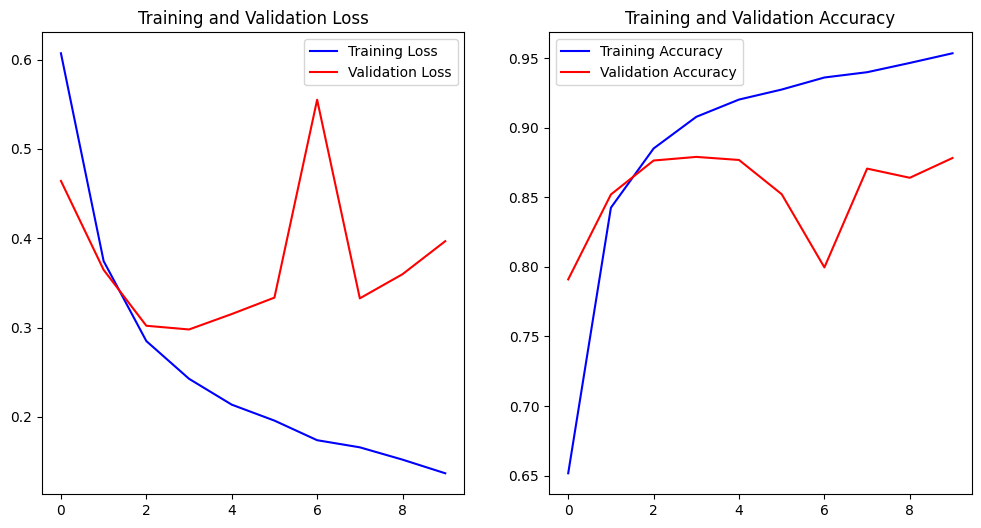

In [21]:
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
epochs = range(len(loss))

f, axarr = plt.subplots(1, 2, figsize=(12, 6))
p0 = axarr[0]
p1 = axarr[1]

p0.set_title("Training and Validation Loss")
p1.set_title("Training and Validation Accuracy")

p0l0 = p0.plot(epochs, loss, "-b", label="Training Loss")
p0l1 = p0.plot( epochs, val_loss, "-r", label="Validation Loss")

p1l0 = p1.plot(epochs, acc, "-b", label="Training Accuracy")
p1l1 = p1.plot(epochs, val_acc, "-r", label="Validation Accuracy")

legend0 = p0.legend()
legend1 = p1.legend()

In [23]:
score = model.evaluate(input_test, output_test)

print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

782/782 [==============================] - 7s 9ms/step - loss: 0.4294 - accuracy: 0.8696
Test Loss: 0.4293958842754364
Test Accuracy: 0.8696399927139282


In [25]:
predictions = model.predict(input_test[0:10])

true_labels = output_test[0:10]

print("0 is a negative comment, 1 is a positive comment.")

for i in range(len(predictions)):
  print("Prediction:", int(round(predictions[i][0])), ",",
        "True Label:", true_labels[i])

1/1 [==============================] - 0s 120ms/step
0 is a negative comment, 1 is a positive comment.
Prediction: 0 , True Label: 0
Prediction: 1 , True Label: 1
Prediction: 1 , True Label: 1
Prediction: 1 , True Label: 0
Prediction: 1 , True Label: 1
Prediction: 1 , True Label: 1
Prediction: 1 , True Label: 1
Prediction: 0 , True Label: 0
Prediction: 1 , True Label: 0
Prediction: 1 , True Label: 1
